In [25]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

### importing the data

In [3]:
scores_df = pd.read_csv(r"/Users/iqrabismi/Desktop/student_scores.csv")

In [4]:
scores_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
len(scores_df)

25

In [12]:
len(scores_df[scores_df.duplicated()==False])

25

In [13]:
scores_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [15]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [16]:
scores_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [17]:
scores_df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

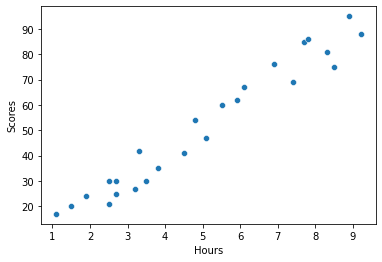

In [19]:
sns.scatterplot(data= scores_df, x='Hours', y='Scores')

#### Linear Relation observed between independent and dependent variable

#### Splitting the data

In [26]:
X= scores_df.Hours.values
Y= scores_df.Scores.values

In [45]:
xtrain,xtest, ytrain,ytest= train_test_split(X,Y,test_size= 0.2, random_state= 10)

## Running the Model on trained data

In [46]:
scores_df2= pd.DataFrame({'Hours':xtrain,'Scores':ytrain})

In [47]:
model = ols("Scores ~ Hours", data= scores_df2)
model = model.fit()
print(model.params)

Intercept    2.649965
Hours        9.814305
dtype: float64


In [48]:
print(model.predict(pd.DataFrame({'Hours':xtest})))

0    17.371423
1    52.702923
2    35.037173
3    34.055743
4    46.814340
dtype: float64


In [49]:
explanatory_data = pd.DataFrame(
{'Hours':xtest}
)
prediction_data = explanatory_data.assign(
Scores=model.predict(explanatory_data)
)

### Showing the Predictions

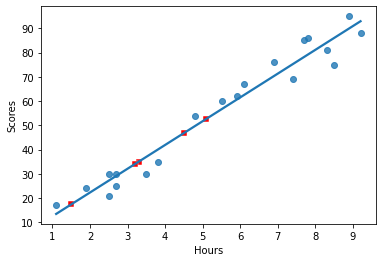

In [50]:
fig = plt.figure()
sns.regplot(x="Hours",
y="Scores",
ci=None,
data=scores_df2,)
sns.scatterplot(x="Hours",
y="Scores",
data=prediction_data,
color="red",
marker="s")
plt.show()

### Running the Model

In [60]:
model = ols("Scores ~ Hours", data= scores_df)
model = model.fit()
print(model.params)

Intercept    2.483673
Hours        9.775803
dtype: float64


#### Hence equation is :
Y= 2.483673 + Hours*9.775803

### Residual attribute

In [61]:
print(model.resid)

0     -5.923182
1     -5.340271
2     -6.766244
3    -10.578002
4     -6.698985
5      2.852622
6     -4.421065
7      3.749408
8     -2.622842
9     -3.878343
10     7.242640
11     1.839087
12    -5.474789
13     7.256175
14     3.762943
15     5.511676
16     3.076818
17     2.942300
18     4.883926
19    -5.824618
20     1.121657
21     4.592470
22    -4.631726
23     6.063283
24     7.265060
dtype: float64


### Summary

In [62]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           9.13e-17
Time:                        01:33:07   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.3

### RSquared 

In [63]:
print(model.rsquared)

0.9529481969048356


### Rsquared is correlation squared

In [65]:
coeff_determination = scores_df["Scores"].corr(scores_df["Hours"]) ** 2
print(coeff_determination)

0.9529481969048358


### Mean Squared Error and Root Mean Squared Error

In [66]:
mse = model.mse_resid
print('mse: ', mse)

mse:  31.394272292658112


In [67]:
rse = np.sqrt(mse)
print("rse: ", rse)

rse:  5.6030591905367295


### Residual Squared

In [68]:
residuals_sq = model.resid ** 2
print("residuals sq: \n", residuals_sq)

residuals sq: 
 0      35.084084
1      28.518491
2      45.782061
3     111.894131
4      44.876404
5       8.137449
6      19.545812
7      14.058060
8       6.879298
9      15.041541
10     52.455841
11      3.382239
12     29.973311
13     52.652082
14     14.159739
15     30.378577
16      9.466810
17      8.657130
18     23.852732
19     33.926181
20      1.258115
21     21.090784
22     21.452888
23     36.763403
24     52.781099
dtype: float64


### RSE (Residual Standard Error)

In [70]:
residuals_sq = model.resid **2
resid_sum_of_sq =sum(residuals_sq) 
deg_freedom =len(scores_df.index) -2
print
("deg freedom: ", deg_freedom)

('deg freedom: ', 23)

In [71]:
residuals_sq = model.resid **2
resid_sum_of_sq =sum(residuals_sq) 
deg_freedom =len(scores_df.index) -2
rse = np.sqrt(resid_sum_of_sq/deg_freedom)
print("rse :", rse)

rse : 5.6030591905367295


#### Intrepreting RSE: The difference between predicted scores  and observed scores is typically around 5.

## Analysing the Model fit based in Linear Regression conditions

### 1. Linear Relation Between Dependent and independent variable

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

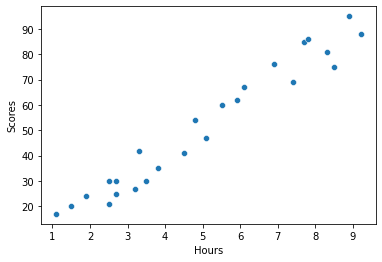

In [98]:
sns.scatterplot(data= scores_df, x='Hours', y='Scores')

### 2. Residual are to be normally distributed. This can be checked by quantile plot and distplot

Text(0, 0.5, 'Residuals')

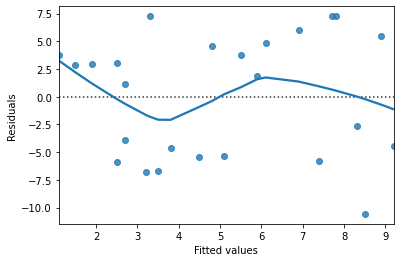

In [72]:
sns.residplot(x="Hours", y="Scores", data=scores_df, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

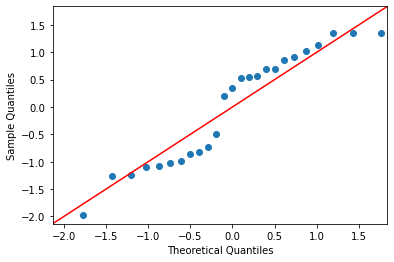

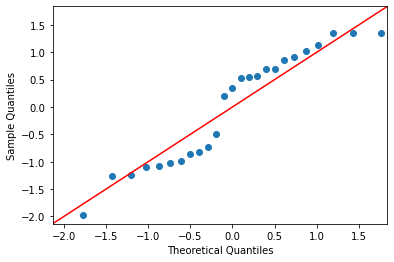

In [73]:
from statsmodels.api import qqplot
qqplot(data=model.resid, fit=True, line="45")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

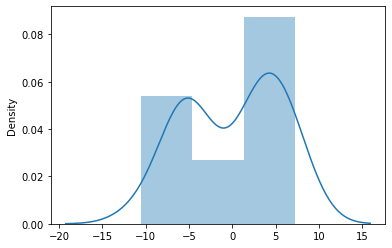

In [74]:
sns.distplot(model.resid)

#### In quantile plot,the residuals roughly lie on the straight line. Also, in distplot, the distribution is bimodal. Hence, residual are normally distributed

### Homodasticity  i.e variance of the residual is constant. This can be checked by Scale-location plot

Text(0, 0.5, 'Sqrt of abs val of stdized residuals')

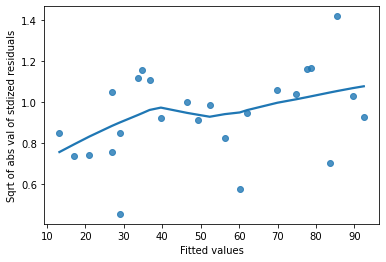

In [75]:
model_norm_residuals = model.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
sns.regplot(x=model.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_43864/1753263740.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


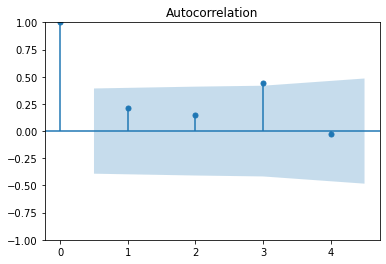

In [77]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(model.resid, lags=4 , alpha=0.05)
acf.show()

#### The line is roughly horizontal and the residuals are randomly scattered. Hence, no correlation amongst the residuals.

### No Multicollinearity 
As there is only one independent feature, so multicollinearity doesn't exist. If the number of descriptive features are more than one. 
Then we can check multicollinearity by using statsmodel variance inflation factor. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

### No outliers

#### 
Checking for extreme values by IQR ie. if the value is less than q1 - 1.5 iqr and if greater than q3+ 1.5 iqr.
Then it is extreme. 

In [85]:
iqr= np.quantile(scores_df['Hours'],0.75) - np.quantile(scores_df['Hours'],0.25)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

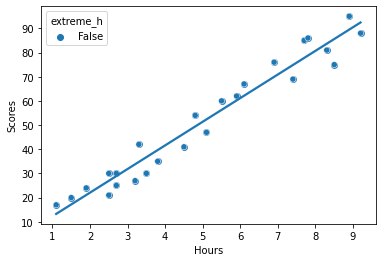

In [93]:
scores_df["extreme_h"] = ((scores_df["Hours"] < (np.quantile(scores_df['Hours'],0.25) - (1.5*iqr))) |
(scores_df["Hours"] > (np.quantile(scores_df['Hours'],0.75) + (1.5*iqr))))
fig = plt.figure()
sns.regplot(x="Hours",
y="Scores",
data=scores_df,
ci=None)
sns.scatterplot(x="Hours",
y="Scores",
hue="extreme_h",
data=scores_df)

In [79]:
model = ols("Scores ~ Hours", data=scores_df).fit()
summary = model.get_influence().summary_frame()
scores_df["leverage"] = summary_roach["hat_diag"]
print(scores_df.head())

   Hours  Scores  leverage
0    2.5      21  0.081236
1    5.1      47  0.040051
2    3.2      27  0.061456
3    8.5      75  0.119504
4    3.5      30  0.054940


In [81]:
scores_df["cooks_dist"] = summary_roach["cooks_d"]
print(scores_df.head())

   Hours  Scores  leverage  cooks_dist
0    2.5      21  0.081236    0.053773
1    5.1      47  0.040051    0.019741
2    3.2      27  0.061456    0.050871
3    8.5      75  0.119504    0.274696
4    3.5      30  0.054940    0.043965


In [82]:
print(scores_df.sort_values("cooks_dist", ascending = False))

    Hours  Scores  leverage  cooks_dist
3     8.5      75  0.119504    0.274696
24    7.8      86  0.090795    0.092328
15    8.9      95  0.138784    0.090532
10    7.7      85  0.087216    0.087453
6     9.2      88  0.154616    0.067347
13    3.3      42  0.059153    0.056037
0     2.5      21  0.081236    0.053773
2     3.2      27  0.061456    0.050871
19    7.4      69  0.077265    0.049032
4     3.5      30  0.054940    0.043965
14    1.1      17  0.140007    0.042691
23    6.9      76  0.063294    0.042237
12    4.5      41  0.041713    0.021684
9     2.7      25  0.074931    0.020976
5     1.5      20  0.120601    0.020211
18    6.1      67  0.047736    0.019998
1     5.1      47  0.040051    0.019741
22    3.8      35  0.049599    0.018761
17    1.9      24  0.103287    0.017711
8     8.3      81  0.110648    0.015327
21    4.8      54  0.040294    0.014695
16    2.5      30  0.081236    0.014510
7     5.5      60  0.041556    0.010129
11    5.9      62  0.045153    0.002668


#### Hence all the values are in range and no extreme values are observed by cook's distance as well as IQR method

### From the above analysis,we checked that all the base conditions are satisfied

## Fitting the OLS line

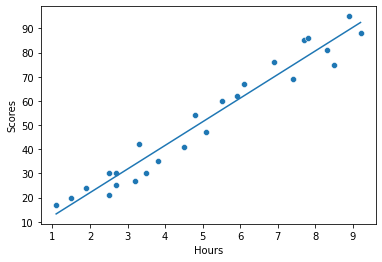

In [100]:
# Fitting the OLS regression line

sns.scatterplot(data=scores_df,x="Hours",y="Scores")
x=np.linspace(min(scores_df['Hours']),max(scores_df['Hours']),30)
y=model.params[0]+ (x * model.params[1])
plt.plot(x,y)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

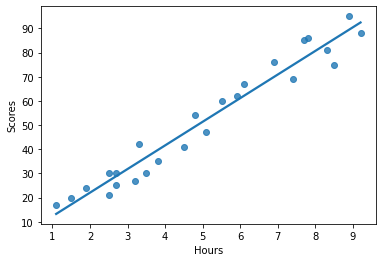

In [99]:
sns.regplot(data= scores_df, x='Hours', y='Scores', ci= None)